# Rendu de projet de:

Yamine KEBAILI  
Morgane QUELENNEC

# 1) Collecte de données
## a) Approches automatisées de la collecte de données

Nous avons téléchargé un dataset sur Kaggle contenant une banque d'image et un csv contenant des informations pour chaque images.

In [1]:
# Import des fonctions et outils utilisé
# imports

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure
import csv
import math
import random
import json
import namegenerator

sklearn.show_versions()
from nltk.corpus import stopwords          # liste des mots non pris en compte
from nltk.tokenize import word_tokenize    # fonction de tokenisation
from nltk.stem import WordNetLemmatizer    # fonction de lemmatisation
from nltk.stem.porter import PorterStemmer # fonction de stemming
import math


System:
    python: 3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]
executable: /bin/python3
   machine: Linux-5.4.72-microsoft-standard-WSL2-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.2.1
          pip: 22.0.2
   setuptools: 66.0.0
        numpy: 1.24.2
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.5.1
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /home/morgane/.local/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
        version: 0.3.21
threading_layer: pthreads
   architecture: SkylakeX
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: /usr/lib/x86_64-linux-gnu/libgomp.so.1.0.0
        version: None
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: 

In [2]:
# Ouverture du dataset

# Récupération entête csv
df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
df.sort_values('id', ascending = True )

/tmp/ipykernel_8952/2530632312.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_8952/2530632312.py:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)


,id,Type1,Type2,Description
0,abomasnow,Grass,Ice,is a dual-type Grass/Ice Pokémon introduced in...
1,abra,Psychic,NaN,is a Psychic-type Pokémon introduced in Genera...
2,absol,Dark,NaN,is a Dark-type Pokémon introduced in Generatio...
3,accelgor,Bug,NaN,is a Bug-type Pokémon introduced in Generation V.
4,aegislash-blade,Steel,Ghost,is a dual-type Steel/Ghost Pokémon introduced ...
...,...,...,...,...
94,charizard,Fire,Flying,Charizard is a dual-type Fire/Flying Pokémon i...
95,charmander,Fire,NaN,Charmander is a Fire-type Pokémon introduced i...
96,charmeleon,Fire,NaN,Charmeleon is a Fire-type Pokémon introduced i...
97,chatot,Normal,Flying,Chatot is a dual-type Normal/Flying Pokémon in...


Chaque ligne correspond à une image. par exemple la ligne contenant le nom de pokémon charizard possède l'image suivante:

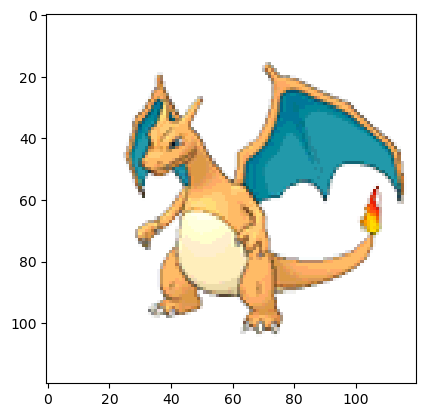

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

image_name = "charizard"
image_path = f"./dataset/images/{image_name}.png"

if not os.path.exists(image_path):
    print(f"Erreur: le fichier {image_path} n'existe pas.")
else:
    try:
        img = mpimg.imread(image_path)
        imgplot = plt.imshow(img)
        plt.show()
    except:
        print(f"Erreur: impossible de lire l'image {image_path}.")


Les informations correspondant à cette image sont les suivantes: 

In [4]:
df.loc[df['id'].isin(["charizard"])]

,id,Type1,Type2,Description
94,charizard,Fire,Flying,Charizard is a dual-type Fire/Flying Pokémon i...


Pour répondre aux questions suivantes: 

**Approches automatisées de la collecte de données** 

--> Nous avons choisi cette méthode car elle nous permettait de répondre rapidement aux exigences du projet. Qui plus 
est, ce dernier est bien fourni en données


**Utilisation d'images sous licence libre**

--> Les images sont disponibles ici: https://www.kaggle.com/dataset/vishalsubbiah/pokemon-images-and-types. Elles sont libres de droits

**Stockage et gestion des images et des métadonnées associées**

--> Les images sont disponibles dans le zip et sont à dézipper (dataset.zip). Les méta-données elles sont disponibles dans le csv: dataset/pokemon.csv

**Approches automatisées de l'étiquetage / Stockage et gestion des étiquettes et des annotations des images**

--> Contenu de notre dataset téléchargé, pas besoin d'étiquettage.

# Méthode par Text-Mining

## OBJECTIF :

Le but de cette application est de proposer des images selon la sélection d'une ou plusieurs images par un utilisateur. La première façon de faire est d'utilisé le text-mining. On utilise la description de l'image pour faire une recherche de similarity sur toutes les descriptions des images.


### Vers de la DOCUMENTATION COMPLEMENTAIRE :

Cette présentation a été conçue grâce aux documentations suivantes :

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html<br>
http://www.nltk.org/

## Plan du document :

1. **Principe de l'algorithme**
    1. **Traitement du corpus**
        1. **Transformation des descriptions**
        1. **Présentation des différentes étapes avec exemples**
    2. **Traitement d'une recherche**
        1. **Vectorisation de la requête**
        1. **Calcul de similarité**
1. **Exécution de l'application**

## 1. Principe de l'algorithme

L'algorithme se base sur l'analyse de la fréquence des mots dans les textes, et fonctionne en deux phases distinctes :

- Une première phase de travail préliminaire de traitement du corpus, qui a pour but de construire une matrice représentatrice de ce dernier
- La phase de recherche à proprement parler, qui consiste représenter de manière vectorielle la requête de l'utilisateur (soit la description de l'image choisir par celui-ci) et trouver la ligne de la matrice du corpus (donc des autres images) lui correspondant le plus

### A. Traitement du corpus

Le but est à partir du corpus constitué de description d'image sous la forme d'une chaîne de caractère de construire une matrice représentatrice de ce dernier. 

Chaque ligne de la matrice représentera une description et chaque colonne représentera un mot présent dans cette corpus. **La valeur dans la matrice à la place (i, j) correspond à l'importance du mot j pour le texte i par rapport au reste des descriptions.** 

Cette valeur doit permettre de choisir parmis les descriptions, ainsi l'importance du mot doit être comprise comme importance au sein du texte en lui-même (répétition du mot dans le texte) et importance dans ce texte par rapport aux autres descriptions (mot présent dans la description mais peu dans le reste du corpus).

#### a. Transformation des descriptions

Pour construire la matrice, on commence par "découper" les descriptions en listes de mots (**tokenisation**). 

On va ensuite éliminer les mots trop communs (**stopwords**), que l'on considère comme ayant trop peu de sens pour être pris en compte (cela peut aussi être la ponctuation). 

On va ensuite appliquer aux mots des transformations, afin de rassembler ceux ayant un sens identique ou proche, de deux types :
- **lemmatisation** : Rassembler des mots sous un même mot-clé
- **stemming** (ou radicalisation) : Rassembler des mots sous un même radical

On utilise pour cela la bibliothèque **nltk** (Natural Language ToolKit) de python. On définit ainsi la fonction "split" suivante :



#### b. Présentation des différentes étapes de scoring avec exemples

Pour cette méthode, nous allons travailler uniquement à l'aide des descriptions des images

In [5]:
# Suppresion des colonnes inutiles
df = df.drop(['Type1', 'Type2'], axis=1)
df

,id,Description
0,abomasnow,is a dual-type Grass/Ice Pokémon introduced in...
1,abra,is a Psychic-type Pokémon introduced in Genera...
2,absol,is a Dark-type Pokémon introduced in Generatio...
3,accelgor,is a Bug-type Pokémon introduced in Generation V.
4,aegislash-blade,is a dual-type Steel/Ghost Pokémon introduced ...
...,...,...
93,chansey,Chansey is a Normal-type Pokémon introduced in...
94,charizard,Charizard is a dual-type Fire/Flying Pokémon i...
95,charmander,Charmander is a Fire-type Pokémon introduced i...
96,charmeleon,Charmeleon is a Fire-type Pokémon introduced i...


In [6]:
!sudo apt install python3-nltk

[sudo] password for morgane: 


In [7]:
!python3 -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
Error installing package. Retry? [n/y/e]
^C
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/morgane/.local/lib/python3.10/site-packages/nltk/downloader.py", line 2544, in <module>
    rv = downloader.download(
  File "/home/morgane/.local/lib/python3.10/site-packages/nltk/downloader.py", line 788, in download
    choice = input().strip()
KeyboardInterrupt


In [8]:
# Import des fonctions et outils utilisé
from nltk.corpus import stopwords          # liste des mots non pris en compte
from nltk.tokenize import word_tokenize    # fonction de tokenisation
from nltk.stem import WordNetLemmatizer    # fonction de lemmatisation
from nltk.stem.porter import PorterStemmer # fonction de stemming

# "Hyperparamètres"
stop_words = set(stopwords.words('english'))
# On peut modeler la liste des mots non pris en compte
stop_words.update(stop_words,{'.',',','!','?','\'s', '<', '>', ':', ';', '/', '(', ')', '-', '_', '{', '}', '--', '...'})
lmtzr=WordNetLemmatizer()
ps = PorterStemmer()


def split(Description):
    """ Fonction qui prend en paramètre un texte (une description d'image) et qui 
    renvoie la liste de ses mots ayant été filtrés puis ayant subits certaines 
    transformations: lemming puis stemming """

    # Tokenisation ************************************************************
    # Découpage du texte en mots (words est une liste de chaine de caractère)
    words = word_tokenize(str(Description))

    # Stop-words **************************************************************
    # Filtrage des mots : on supprime de words ceux qui sont contenus dans 
    # stop_words car ils sont supposés avoir trop peu de sens.
    # (mots trop communs, mots de liaisons, ponctuation)
    words_clean = []
    for word in words:
        if word.lower() not in stop_words:
            words_clean.append(word)
    
    # Lemming *****************************************************************
    # Transformation des mots en un unique mot-clé (lemme) les représentant. 
    # Ex: divided, dividing, divided, divides -> divide
    words_lemmed = [lmtzr.lemmatize(word) for word in words_clean]
            
    # Stemming ****************************************************************
    # Transformation des mots en un unique radical les représentant. 
    # Ex: divided, dividing, divided, divides -> divid
    words_stemmed = [ps.stem(word) for word in words_lemmed]
    
    return words_stemmed

In [ ]:
!sudo pip install -U nltk

Exemple de la fonction split

In [9]:
# splitons la ligne suivante: 
keep_line = df.loc[df['id'].isin(["abra"])]
keep_line

,id,Description
1,abra,is a Psychic-type Pokémon introduced in Genera...


In [10]:
# On obtient alors: 
description_test = keep_line['Description'][1]
try:
    words = description_test.split()
    print(words)
except Exception as e:
    print(f"An error occurred: {e}")

['is', 'a', 'Psychic-type', 'Pokémon', 'introduced', 'in', 'Generation', 'I.']


On peut alors identifier les **"tokens"** (mots distincts) du corpus, qui forment donc une base de représentation des descriptions sous forme vectorielle.

Tachons à présent de transformer nos descriptions en matrice via les différents fonctions suivantes:

In [20]:
def count(words, wordbase):
    """ Fonction qui prend en paramètre un texte 'splité' en mots et la liste 
    des tokens du corpus, et renvoie le vecteur contenant le nombre d'occurence 
    dans le texte des tokens du corpus."""
    
    vector = [0 for i in range(len(wordbase))]
    for i in range(len(wordbase)):
        if wordbase[i] in words:
            vector[i] += 1
    return vector


def preliminaryWork(corpus):
    """ Fonction qui prend en paramètre un corpus de description sous la forme d'une 
    liste de chaines de caractère, et qui renvoie la liste des mots utilisés 
    comme base pour représenter les textes qui le compose, et la matrice de ces
    textes dans cette base, les coordonnées étant calculées par la formule du 
    TF-IDF."""
    
    # Découpage, tri et transformation des textes (voir split)
    corpus_words = []
    for i in range(len(corpus)):
        corpus_words.append(split(corpus[i]))
        
    # Construction de la liste des mots du corpus (intersection des mots des 
    # textes). Wordset est un objet de type set, intéressant car il permet de 
    # faire l'intersection seul, mais pas ordonné. On construit donc wordbase
    # à partir des mots de wordset pour pouvoir associer 1 mot à 1 coordonnée.
    wordset = set()
    for words in corpus_words:
        wordset = wordset.union(set(words))
    wordbase = [word for word in wordset]
    
    # Construction de la matrice représentant les textes dans la base wordbase.
    # On l'initialise avec les vecteurs dont les coordonnées sont les 
    # occurences brutes.
    matrix = []
    for words in corpus_words:
        matrix.append(count(words, wordbase))
        
    # Calcul du nombe de textes contenant chaque mot
    nt = [0 for m in range(len(wordbase))]
    for m in range(len(wordbase)):
        for line in matrix:
            if line[m] > 0:
                nt[m] += 1
    
    # Calcul du tf-idf de chaque mot dans chaque texte
    # TF(mot dans un texte) = log(1 + nb d'occurence de ce mot dans ce texte)
    # IDF(mot) = log(nombre de textes total / nombre de texte cntenant ce mot)
    # TF-IDF(mot dans un texte) = TF(mot dans un texte) * IDF(mot)
    for t in range(len(matrix)):
        for m in range(len(wordbase)):
            matrix[t][m] = math.log(1 + matrix[t][m]) * math.log(len(corpus) / nt[m])
            
    return (matrix, wordbase)

In [15]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/morgane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Exemple: Prenons les 4 premières lignes de la feuille de styles.csv

In [21]:
nombre_de_description_test= 4
compteur = 0

while compteur < nombre_de_description_test:
    print(f"description {compteur}: {df['Description'][compteur]}")
    compteur = compteur+1

(matrix, wordbase) = preliminaryWork(df['Description'][:nombre_de_description_test])

description 0: is a dual-type Grass/Ice Pokémon introduced in Generation IV.
description 1: is a Psychic-type Pokémon introduced in Generation I.
description 2: is a Dark-type Pokémon introduced in Generation III.
description 3: is a Bug-type Pokémon introduced in Generation V.


Affichons la matrice 

In [22]:
df2 = pd.DataFrame(np.array(matrix),columns=wordbase,index=df['id'][:nombre_de_description_test])

nombre_de_description_test= 4
compteur = 0

df2

,bug-typ,introduc,v,dark-typ,grass/ic,iii,pokémon,iv,psychic-typ,dual-typ,gener
id,,,,,,,,,,,
abomasnow,0.000000,0.0,0.000000,0.000000,0.960906,0.000000,0.0,0.960906,0.000000,0.960906,0.0
abra,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.960906,0.000000,0.0
absol,0.000000,0.0,0.000000,0.960906,0.000000,0.960906,0.0,0.000000,0.000000,0.000000,0.0
accelgor,0.960906,0.0,0.960906,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


Le mot "men" apparait 1 fois dans la description 1, 2 et 3. Il obtient alors un score de 0.199. Ce qui signifie que ce mot n'est pas très important qui il se retrouve dans plusieurs description (valeur proche de zéro). 

Si on prend le mot "silver" qui ne se trouve que dans la description 3, il obtient un score de 0.960906 (proche de 1), ce qui permet de souligner l'importance de se mot d'une part dans la description, mais également par rapport aux autres descriptions.

## B. Traitement d'une recherche

Une fois que la matrice représentatrice du corpus a été construite, on va vouloir traiter les requêtes de l'utilisateur. Pour cela, on va procéder en deux temps :
- vectoriser la requête, comme on a vectorisé les descriptions du corpus
- identifier la description la plus proche de la requête en calculant la similarité entre la requête et chaque description

### a. Vectorisation de la requête

On cherche à mettre la requête sous la forme d'un vecteur. Afin que les vecteurs de la requête et des desscriptions soient comparables et que les calculs aient un sens, il faut **appliquer à la requête le même traitement qu'on a appliqué aux descrptions**. Ainsi, on s'assure que les coordonnées de la requêtes portent bien sur les bons tokens.

Pour les coordonnées du vecteur, on va simplement associer à chaque token sa fréquence dans la requête.

Pour cela, on réutilise les fonctions "split" et "count" utilisées pour le traitement du corpus, afin de définir la fonction "vectorisation" suivante :

### Dans notre cas, l'utiliseur possède les données suivantes:

In [23]:
#Chargement de nos utilisateurs
import json

with open('user_demo.json') as json_file:
    data = json.load(json_file)

print(f"data: {data}")

data: {'users': [{'name': 'yamine', 'name_photo_liked': ['abra', 'arbok', 'cacturne', 'boldore']}, {'name': 'morgane', 'name_photo_liked': ['clefable', 'combee', 'corsola', 'dragonair']}, {'name': 'emre', 'name_photo_liked': ['crustle', 'duskull']}, {'name': 'abou', 'name_photo_liked': ['corsola', 'beldum', 'archen']}]}


Par exemple l'utilisateur Yamine a liké les photos suivantes:

Pokemons liked by Yamine: ['abra', 'arbok', 'cacturne', 'boldore']

Image Name: abra


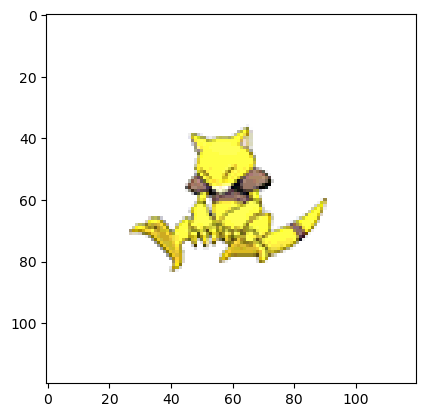


Image Name: arbok


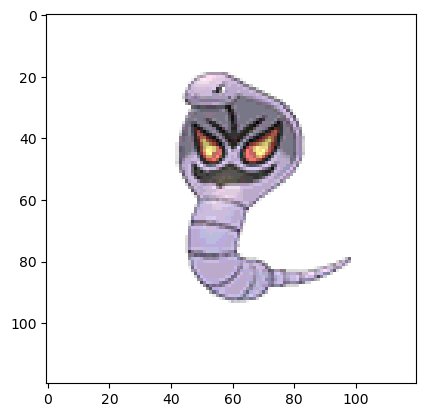


Image Name: cacturne


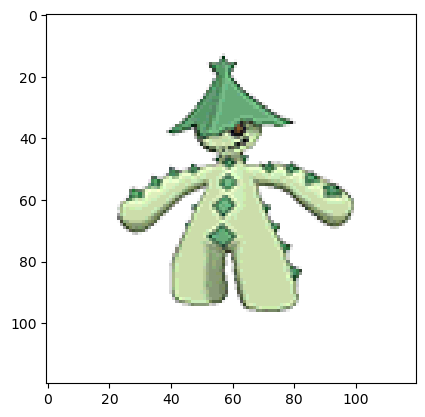


Image Name: boldore


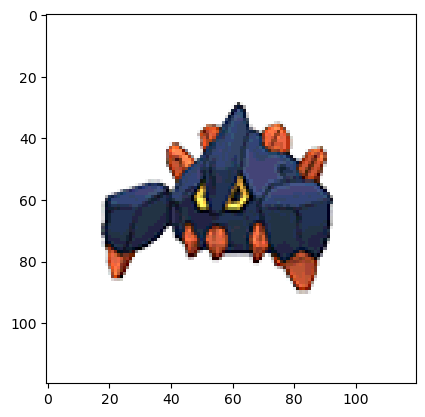

In [24]:
def find_user(user_list: list, name: str):
    """Find user by his name"""
    for i, user in enumerate(user_list):
        if user.get('name') == name:
            return user, i
    raise ValueError(f"User with name {name} not found in user list")

try:
    user_profile, position_in_list = find_user(data['users'], "yamine")
except ValueError as e:
    print(e)
else:
    photo_liked_by_yamine = user_profile.get('name_photo_liked')
    print(f"Pokemons liked by Yamine: {photo_liked_by_yamine}")

    for image in photo_liked_by_yamine:
        img = mpimg.imread(f"./dataset/images/{image}.png")
        imgplot = plt.imshow(img)
        print(f"\nImage Name: {image}")
        plt.show()

Nous allons récupérer les descriptions liées à ces photos

In [25]:
keep_df = df.loc[df['id'].isin(photo_liked_by_yamine)]
keep_df

,id,Description
1,abra,is a Psychic-type Pokémon introduced in Genera...
17,arbok,is a Poison-type Pokémon introduced in Generat...
61,boldore,is a Rock-type Pokémon introduced in Generatio...
81,cacturne,is a dual-type Grass/Dark Pokémon introduced i...


Nous allons nous servir de ces dernières comme requêtes pour les photos que nous allons lui recommander
Tentons de lui recommander 4 photos liés à la dernière images

In [26]:
# Récupération de la descriptions de la dernière image
# On obtient alors: 
description_test = keep_df['Description'].values[int(len(keep_df))-1]
print(f"description_test: {description_test}")

description_test: is a dual-type Grass/Dark Pokémon introduced in Generation III.


In [27]:
def vectorisation(text, wordbase):
    """ Fonction qui prend en paramètre un texte sous la forme d'une chaine de 
    caractère, et la liste des mots du corpus et qui renvoie le vecteur 
    représentant le texte dans la base du corpus."""
    
    return count(split(text), wordbase)

### b. Calcul de similarité

On va calculer pour chaque description un score correspondant à sa proximité à la requête. 

Pour cela on calcule pour chaque vecteur de texte du corpus (donc ligne de la matrice) sa similarité avec le vecteur de la requête.

On utilise ici la similarité cosinus qui se calcule de la manière suivante :<br>
Sim(t) = <R, T> / ( ||R|| * ||T|| )<br>
Où T est le vecteur du texte t (= la ligne M[t]), R le vecteur de la requête,  < , > un produit scalaire et || || la norme associée.

On va donc calculer la liste de ces valeurs pour chaque test, puis sélectionner les meilleurs résultats (le nombre de résultat choisi étant arbitraire). On définit donc les fonctions suivantes :

Nous allons lui recommander 3 images par rapport à l'image précédentes

In [28]:
import math
nbTop =  3

def scal(v1, v2):
    """ Fonction qui calcule le produit scalaire entre deux vecteurs de même taille et la renvoie."""
    scal = 0
    for i in range(len(v1)):
        scal += v1[i] * v2[i]
    return (scal)
  
    
def norm(v):
    """ Fonction qui calcule la norme 2 d'un vecteur et la renvoie."""
    n = math.sqrt(scal(v, v))
    if (n == 0):
        n = 1
    return (n)


def iMax(similarity):
    """ Fonction qui renvoie l'indice du maximum de la liste passée en paramètre """
    imax = 0
    for i in range(1,len(similarity)):
        if (similarity[i] > similarity[imax]):
            imax = i
    return (imax)


def top(similarity, nbTop):
    """ Fonction qui renvoie la liste des indices des nbTop éléments 
    les plus grands de la liste passée en paramètre (similarity), 
    dans l'ordre décroissant. """
    order = []
    cptTop = 0
    imax = iMax(similarity)
    while (similarity[imax] >= 0 and cptTop < nbTop):
        order.append(imax)
        # On met à -1 l'élément dont on vient de prendre l'indice pour ne plus le prendre en compte
        similarity[imax] = -1
        cptTop += 1
        imax = iMax(similarity)
    return (order)


def research(request, matrix, wordbase):
    """ Fonction qui prend en paramètre une requête sous la forme d'une
    chaîne de caractère, la matrice représentatrice du corpus et la liste
    des tokens, et qui renvoie la liste des indices des descriptions dans le
    corpus correspondant le plus à la requête. """
    # Vectorisation de la requête
    vector = vectorisation(request, wordbase)
    # Calcul de la liste des score de similarité pour chaque vecteur de la matrice
    similarity = []
    for v2 in matrix:
        similarity.append(scal(vector, v2) / (norm(vector) * norm(v2)))
    # On renvoie les meilleurs résultats
    return (top(similarity, nbTop))


def printResearch(order, corpus):
    """ Fonction qui à partir des résultats d'une requête (liste d'indices) et 
    du corpus utilisé affiche les textes dans la console, le plus représentatif
    en premier"""
    print("*\t*\t*\t*\t*\t*\t*\t*")
    print("*\t*\tRésultats de la recherche\t*\t*")
    print("*\t*\t*\t*\t*\t*\t*\t*\n\n")
    for i in range(len(order)):
        print("*\t*\t*\t*\t*\t*\t*\t*")
        print("*\t*\tNuméro " + str(i + 1) + " - Images " + str(order[i]) + "\t*\t*\t*")
        print("*\t*\t*\t*\t*\t*\t*\t*\n\n")
        print(corpus[order[i]])
        printImage(str(order[i]))

    
def printImage(rows: str):
    """Affiche l'image correspondante à ligne trouvée"""
    current_id = df.iloc[int(rows)]["id"]
    print(f"current_id: {current_id}")
    img = mpimg.imread(f"dataset/images/{current_id}.png")
    imgplot = plt.imshow(img)
    plt.show()

## 2. Exécution de l'application

Ouverture des données

In [29]:
# Ouverture du dataset

# Récupération entête csv
df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
df.sort_values('id', ascending = True )
# Suppresion des colonnes inutiles
df = df.drop(['Type1', 'Type2'], axis=1)
df

/tmp/ipykernel_8952/2042103732.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_8952/2042103732.py:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)


,id,Description
0,abomasnow,is a dual-type Grass/Ice Pokémon introduced in...
1,abra,is a Psychic-type Pokémon introduced in Genera...
2,absol,is a Dark-type Pokémon introduced in Generatio...
3,accelgor,is a Bug-type Pokémon introduced in Generation V.
4,aegislash-blade,is a dual-type Steel/Ghost Pokémon introduced ...
...,...,...
93,chansey,Chansey is a Normal-type Pokémon introduced in...
94,charizard,Charizard is a dual-type Fire/Flying Pokémon i...
95,charmander,Charmander is a Fire-type Pokémon introduced i...
96,charmeleon,Charmeleon is a Fire-type Pokémon introduced i...


Rappelons les photos likées par l'utilisateur appelé "yamine"

Pokemons liked by Yamine: ['abra', 'arbok', 'cacturne', 'boldore']

Nom de l'image: abra


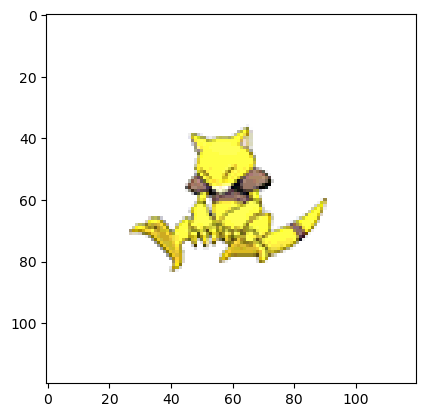


Nom de l'image: arbok


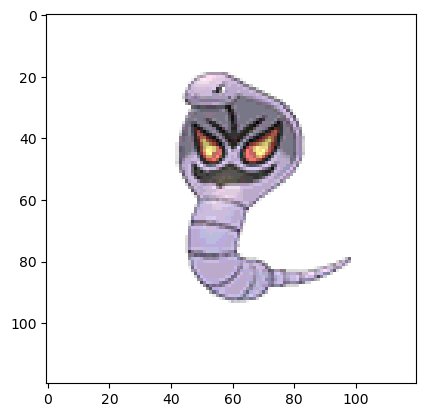


Nom de l'image: cacturne


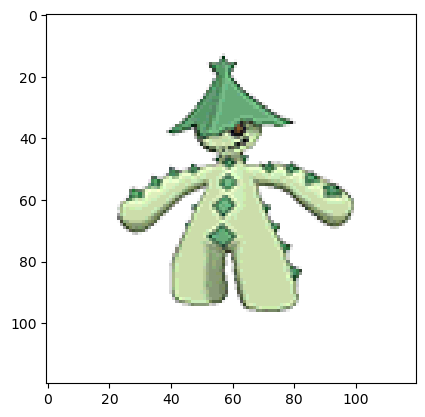


Nom de l'image: boldore


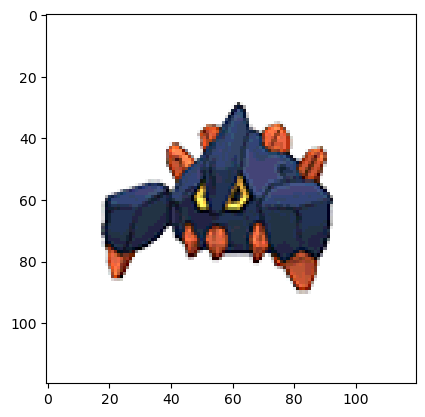

In [30]:
def find_user(user_list: list, name: str):
    """Find user by his name"""
    for i, user in enumerate(user_list):
        if user.get('name') == name:
            return user, i
    raise ValueError(f"User with name {name} not found in user list")

try:
    user_profile, position_in_list = find_user(data['users'], "yamine")
except ValueError as e:
    print(e)
else:
    photo_liked_by_yamine = user_profile.get('name_photo_liked')
    print(f"Pokemons liked by Yamine: {photo_liked_by_yamine}")

    for image in photo_liked_by_yamine:
        img = mpimg.imread(f"./dataset/images/{image}.png")
        imgplot = plt.imshow(img)
        print(f"\nNom de l'image: {image}")
        plt.show()


In [31]:
# Récupération des lignes concernées
keep_df = df.loc[df['id'].isin(photo_liked_by_yamine)]
print(f"row yamine liked: {keep_df}\n")

# Suppression des lignes dans le dataset
for id_photo in photo_liked_by_yamine:
    indexNames = df[df['id'] == id_photo].index
    # Delete these row indexes from dataFrame
    df.drop(indexNames , inplace=True)
    
print(f"df with rows deletes: {df}")

row yamine liked:           id                                        Description
1       abra  is a Psychic-type Pokémon introduced in Genera...
17     arbok  is a Poison-type Pokémon introduced in Generat...
61   boldore  is a Rock-type Pokémon introduced in Generatio...
81  cacturne  is a dual-type Grass/Dark Pokémon introduced i...

df with rows deletes:                  id                                        Description
0         abomasnow  is a dual-type Grass/Ice Pokémon introduced in...
2             absol  is a Dark-type Pokémon introduced in Generatio...
3          accelgor  is a Bug-type Pokémon introduced in Generation V.
4   aegislash-blade  is a dual-type Steel/Ghost Pokémon introduced ...
5        aerodactyl  is a dual-type Rock/Flying Pokémon introduced ...
..              ...                                                ...
93          chansey  Chansey is a Normal-type Pokémon introduced in...
94        charizard  Charizard is a dual-type Fire/Flying Pokémon i...


In [32]:
# Nombre de ligne à conserver
line_number = len(df)//8
line_number

11

In [45]:
# Construction de la matrice
(matrix, wordbase) = preliminaryWork(df['Description'][:line_number])

# observation des données
result = pd.DataFrame(np.array(matrix),columns=wordbase,index=df['id'][:line_number])
result

KeyError: 1

Créons la liste des images à recommander

row yamine liked:           id                                        Description
1       abra  is a Psychic-type Pokémon introduced in Genera...
17     arbok  is a Poison-type Pokémon introduced in Generat...
61   boldore  is a Rock-type Pokémon introduced in Generatio...
81  cacturne  is a dual-type Grass/Dark Pokémon introduced i...


 Recommandation pour


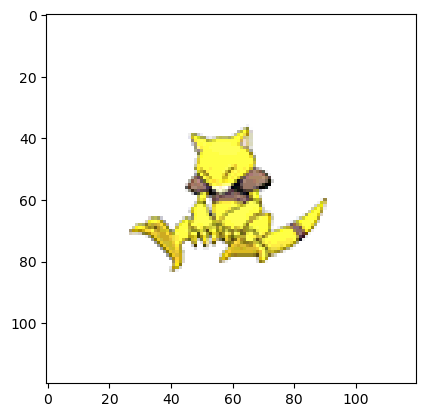

order: [1, 0, 2]
*	*	*	*	*	*	*	*
*	*	Résultats de la recherche	*	*
*	*	*	*	*	*	*	*


*	*	*	*	*	*	*	*
*	*	Numéro 1 - Images 1	*	*	*
*	*	*	*	*	*	*	*




KeyError: 1

In [38]:
print(f"row yamine liked: {keep_df}\n")

for photo in photo_liked_by_yamine:
    line_condition = keep_df['id'] == photo
    new_df = keep_df[line_condition]
    current_description = new_df['Description'].values[0]
    current_id = new_df['id'].values[0]
    
    print("\n Recommandation pour")
    img = mpimg.imread(f"dataset/images/{current_id}.png")
    imgplot = plt.imshow(img)
    plt.show()
    
    # Recherce
    order = research(current_description, matrix, wordbase)
    print(f"order: {order}")
    printResearch(order,df['Description'])
    


Ainsi pour chaque image liké par l'utilisateur yamine, nous avons des images à lui recommander

## 3. Application tout en un

In [46]:
# "Hyperparamètres"
stop_words = set(stopwords.words('english'))
# On peut modeler la liste des mots non pris en compte
stop_words.update(stop_words,{'.',',','!','?','\'s', '<', '>', ':', ';', '/', '(', ')', '-', '_', '{', '}', '--', '...'})
lmtzr=WordNetLemmatizer()
ps = PorterStemmer()
# Nombre total d'utilisateur
user_max = 4
# Nombre de recommandation par rapport à une image
nbTop =  4
# Coefficient de réduction de ligne
coeff = 100

def split(description):
    """ Fonction qui prend en paramètre un texte (une description d'image) et qui 
    renvoie la liste de ses mots ayant été filtrés puis ayant subits certaines 
    transformations: lemming puis stemming """

    # Tokenisation ************************************************************
    # Découpage du texte en mots (words est une liste de chaine de caractère)
    words = word_tokenize(str(description))

    # Stop-words **************************************************************
    # Filtrage des mots : on supprime de words ceux qui sont contenus dans 
    # stop_words car ils sont supposés avoir trop peu de sens.
    # (mots trop communs, mots de liaisons, ponctuation)
    words_clean = []
    for word in words:
        if word.lower() not in stop_words:
            words_clean.append(word)
    
    # Lemming *****************************************************************
    # Transformation des mots en un unique mot-clé (lemme) les représentant. 
    # Ex: divided, dividing, divided, divides -> divide
    words_lemmed = [lmtzr.lemmatize(word) for word in words_clean]
            
    # Stemming ****************************************************************
    # Transformation des mots en un unique radical les représentant. 
    # Ex: divided, dividing, divided, divides -> divid
    words_stemmed = [ps.stem(word) for word in words_lemmed]
    
    return words_stemmed


def count(words, wordbase):
    """ Fonction qui prend en paramètre un texte 'splité' en mots et la liste 
    des tokens du corpus, et renvoie le vecteur contenant le nombre d'occurence 
    dans le texte des tokens du corpus."""
    
    vector = [0 for i in range(len(wordbase))]
    for i in range(len(wordbase)):
        if wordbase[i] in words:
            vector[i] += 1
    return vector


def preliminaryWork(corpus):
    """ Fonction qui prend en paramètre un corpus de description sous la forme d'une 
    liste de chaines de caractère, et qui renvoie la liste des mots utilisés 
    comme base pour représenter les textes qui le compose, et la matrice de ces
    textes dans cette base, les coordonnées étant calculées par la formule du 
    TF-IDF."""
    
    # Découpage, tri et transformation des textes (voir split)
    corpus_words = []
    for i in range(len(corpus)):
        corpus_words.append(split(corpus[i]))
        
    # Construction de la liste des mots du corpus (intersection des mots des 
    # textes). Wordset est un objet de type set, intéressant car il permet de 
    # faire l'intersection seul, mais pas ordonné. On construit donc wordbase
    # à partir des mots de wordset pour pouvoir associer 1 mot à 1 coordonnée.
    wordset = set()
    for words in corpus_words:
        wordset = wordset.union(set(words))
    wordbase = [word for word in wordset]
    
    # Construction de la matrice représentant les textes dans la base wordbase.
    # On l'initialise avec les vecteurs dont les coordonnées sont les 
    # occurences brutes.
    matrix = []
    for words in corpus_words:
        matrix.append(count(words, wordbase))
        
    # Calcul du nombe de textes contenant chaque mot
    nt = [0 for m in range(len(wordbase))]
    for m in range(len(wordbase)):
        for line in matrix:
            if line[m] > 0:
                nt[m] += 1
    
    # Calcul du tf-idf de chaque mot dans chaque texte
    # TF(mot dans un texte) = log(1 + nb d'occurence de ce mot dans ce texte)
    # IDF(mot) = log(nombre de textes total / nombre de texte cntenant ce mot)
    # TF-IDF(mot dans un texte) = TF(mot dans un texte) * IDF(mot)
    for t in range(len(matrix)):
        for m in range(len(wordbase)):
            matrix[t][m] = math.log(1 + matrix[t][m]) * math.log(len(corpus) / nt[m])
            
    return (matrix, wordbase)


def vectorisation(text, wordbase):
    """ Fonction qui prend en paramètre un texte sous la forme d'une chaine de 
    caractère, et la liste des mots du corpus et qui renvoie le vecteur 
    représentant le texte dans la base du corpus."""
    
    return count(split(text), wordbase)


def scal(v1, v2):
    """ Fonction qui calcule le produit scalaire entre deux vecteurs de même taille et la renvoie."""
    scal = 0
    for i in range(len(v1)):
        scal += v1[i] * v2[i]
    return (scal)
  
    
def norm(v):
    """ Fonction qui calcule la norme 2 d'un vecteur et la renvoie."""
    n = math.sqrt(scal(v, v))
    if (n == 0):
        n = 1
    return (n)


def iMax(similarity):
    """ Fonction qui renvoie l'indice du maximum de la liste passée en paramètre """
    imax = 0
    for i in range(1,len(similarity)):
        if (similarity[i] > similarity[imax]):
            imax = i
    return (imax)


def top(similarity, nbTop):
    """ Fonction qui renvoie la liste des indices des nbTop éléments 
    les plus grands de la liste passée en paramètre (similarity), 
    dans l'ordre décroissant. """
    
    order = []
    cptTop = 0
    imax = iMax(similarity)
    while (similarity[imax] >= 0 and cptTop < nbTop):
        order.append(imax)
        # On met à -1 l'élément dont on vient de prendre l'indice pour ne plus le prendre en compte
        similarity[imax] = -1
        cptTop += 1
        imax = iMax(similarity)
        
    return (order)


def research(request, matrix, wordbase):
    """ Fonction qui prend en paramètre une requête sous la forme d'une
    chaîne de caractère, la matrice représentatrice du corpus et la liste
    des tokens, et qui renvoie la liste des indices des descriptions dans le
    corpus correspondant le plus à la requête. """
    
    # Vectorisation de la requête
    vector = vectorisation(request, wordbase)
    # Calcul de la liste des score de similarité pour chaque vecteur de la matrice
    similarity = []
    for v2 in matrix:
        similarity.append(scal(vector, v2) / (norm(vector) * norm(v2)))
    # On renvoie les meilleurs résultats

    return (top(similarity, nbTop))


def printResearch(order, corpus):
    """ Fonction qui à partir des résultats d'une requête (liste d'indices) et 
    du corpus utilisé affiche les textes dans la console, le plus représentatif
    en premier"""
    print("*\t*\t*\t*\t*\t*\t*\t*")
    print("*\t*\tRésultats de la recherche\t*\t*")
    print("*\t*\t*\t*\t*\t*\t*\t*\n\n")
    for i in range(len(order)):
        print("*\t*\t*\t*\t*\t*\t*\t*")
        print("*\t*\tNuméro " + str(i + 1) + " - Images " + str(order[i]) + "\t*\t*\t*")
        print("*\t*\t*\t*\t*\t*\t*\t*\n\n")
        print(corpus[order[i]])
        printImage(str(order[i]))

    
def printImage(rows: str):
    """Affiche l'image correspondante à ligne trouvée"""
    current_id = df.iloc[int(rows)]["id"]
    img = mpimg.imread(f"dataset/images/{current_id}.png")
    imgplot = plt.imshow(img)
    plt.show()
    
    
def random_number():
    return random.randint(1, 5)


def random_number_with_parameter(parameter):
    """ Generate random number with a limite"""
    val = random.randint(1, parameter)
    return val


def build_user(user_name: str, list_liked_image: list):
    """Build incidents with parameters."""
    user = {
        "name": user_name,
        "id_photo_liked": list_liked_image,
        "recommandations": []
    }
    return user
               
               
def generate_liked_image(number_image):
    # Récupération entête csv
    df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
    df.sort_values('id', ascending = True )
    line_number = len(df)//coeff
    # Suppresion des colonnes inutiles
    df = df.drop(['Type1', 'Type2', 'Description'], axis=1)
    df = df[:line_number]
    image_counter = 0
    list_liked_image = []
    while image_counter < number_image:
        current_id = int(df.iloc[random_number_with_parameter(line_number-1)])
        list_liked_image.append(current_id)
        image_counter = image_counter + 1
    
    return list_liked_image

    
def generate_data():
    """Generate and return data, save it on users_data.json"""
    
    data = {"users": []}
    user_counter = 0

    while user_counter < user_max:
        list_liked_image = generate_liked_image(random_number())
        data["users"].append(build_user(namegenerator.gen(), list_liked_image))
        user_counter = user_counter + 1
                             
    with open("users_data.json", "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)


def find_user(user_list: dict, name: str):
    """Find user by his name"""
    
    user_profile = {}
    position_in_list = 0
    for user in user_list:
        if user.get('name') == name:
            user_profile = user
            good_position = position_in_list
        position_in_list = position_in_list + 1
    
    return user_profile, good_position
        

def save_recommandation(user, origin_photo, recommandation):
    """Save recommandation"""
    with open('users_data.json') as json_file:
        data = json.load(json_file)
    user_profile, position_in_list = find_user(data.get('users'), user)
    dict_recommandation = {
        "origin_photo": int(origin_photo),
        "recommandations":  recommandation
    }
    data["users"][position_in_list].get("recommandations").append(dict_recommandation)
    with open('users_data.json', 'w') as outfile:
        json.dump(data, outfile)
        

def prepare_df():
    """ Remove some column"""
    df = pd.read_csv(r'./dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
    df.sort_values('id', ascending = True )
    # Suppresion des colonnes inutiles
    df = df.drop(['Type1','Type2'], axis=1)
    line_number = len(df)//coeff
    df = df[:line_number]
    return df


def recommandation():
    # Load data
    with open('users_data.json') as json_file:
        data = json.load(json_file)
    # Pour chaque utilisateur
    for user in data.get('users'):
        user_name = user.get("name")
        photo_liked_by_user = user.get('id_photo_liked')
        # Fabrication du DF
        df = prepare_df()
        # Récupération de la ligne liké
        keep_df = df.loc[df['id'].isin(photo_liked_by_user)]
        # Construction de la matrix à partir du DF nettoyé
        (matrix, wordbase) = preliminaryWork(df['Description'][:len(df)])
        # Processus de recommandation pour chaque photo
        for photo in photo_liked_by_user:
            line_condition = keep_df['id'] == photo
            new_df = keep_df[line_condition]
            current_description = new_df['Description'].values[0]
            current_id = new_df['id'].values[0]
            # Recherche
            order = research(current_description, matrix, wordbase)
            recommandation = []
            first_recommandation = True
            for row in order:
                if first_recommandation:
                    first_recommandation = False
                else:
                    recommandation.append(str(df.iloc[int(row)]["id"]))
            save_recommandation(user_name, current_id, recommandation)
            

def show_random_user_recommandation():
    """Show random recommandation"""
    # Load data
    with open('users_data.json') as json_file:
        data = json.load(json_file)
    # Select random user
    user_list_position = random_number_with_parameter(len(data.get("users"))) - 1
    print(f"user_list_position: {user_list_position}")
    user =  data.get("users")[user_list_position]
    # pour chaque photo liké by this user
    print(f"L'utlisateur: {user.get('name')}")
    for photo in user.get("recommandations"):
        print("\n a aimé la photo")
        img = mpimg.imread(f"./dataset/images/{photo.get('origin_photo')}.png")
        imgplot = plt.imshow(img)
        plt.show()
        print("\n Il lui à été recommandé: ")
        for recommandation in photo.get("recommandations"):
            img = mpimg.imread(f"./dataset/images/{recommandation}.png")
            imgplot = plt.imshow(img)
            plt.show()
            

generate_data()
recommandation()
show_random_user_recommandation()

/tmp/ipykernel_8952/1149447364.py:216: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_8952/1149447364.py:216: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)


ValueError: empty range for randrange() (1, 0, -1)

# Méthode par Text-Mining combiné à la classification

## OBJECTIF :

Dans cette méthode, nous allons utilisé les mêmes principes de text-ming mais au lieu de réaliser un moteur de recherche, nous allons créer plusieurs classifieurs. Le principe reste quasiment le même, nous allons travailler avec les descriptions des photos  mais ces dernières seront associées à deux valeurs possibles (like ou dislike par l'utilisateurs). 

### Vers de la DOCUMENTATION COMPLEMENTAIRE :

Cette présentation a été conçue grâce aux documentations suivantes :

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html<br>
http://www.nltk.org/

In [47]:
# Import des fonctions et outils utilisé
# imports

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure
import csv
import math
import random
import json
import namegenerator

sklearn.show_versions()
import nltk
from nltk.corpus import stopwords          # liste des mots non pris en compte
from nltk.tokenize import word_tokenize    # fonction de tokenisation
from nltk.stem import WordNetLemmatizer    # fonction de lemmatisation
from nltk.stem.porter import PorterStemmer # fonction de stemming
import math

from sklearn.preprocessing import LabelEncoder


System:
    python: 3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]
executable: /bin/python3
   machine: Linux-5.4.72-microsoft-standard-WSL2-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.2.1
          pip: 22.0.2
   setuptools: 66.0.0
        numpy: 1.24.2
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.5.1
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /home/morgane/.local/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
        version: 0.3.21
threading_layer: pthreads
   architecture: SkylakeX
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: /usr/lib/x86_64-linux-gnu/libgomp.so.1.0.0
        version: None
    num_threads: 8

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: 

## A. Pré-traitement des données
### 1. Ouverture du dataset

In [49]:
# Ouverture du dataset

# Récupération entête csv
df = pd.read_csv(r'./dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
df.sort_values('id', ascending = True )

df = df.drop(['Type1', 'Type2'], axis=1)
df

/tmp/ipykernel_8952/4114586332.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'./dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_8952/4114586332.py:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r'./dataset/pokemon.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)


,id,Description
0,abomasnow,is a dual-type Grass/Ice Pokémon introduced in...
1,abra,is a Psychic-type Pokémon introduced in Genera...
2,absol,is a Dark-type Pokémon introduced in Generatio...
3,accelgor,is a Bug-type Pokémon introduced in Generation V.
4,aegislash-blade,is a dual-type Steel/Ghost Pokémon introduced ...
...,...,...
93,chansey,Chansey is a Normal-type Pokémon introduced in...
94,charizard,Charizard is a dual-type Fire/Flying Pokémon i...
95,charmander,Charmander is a Fire-type Pokémon introduced i...
96,charmeleon,Charmeleon is a Fire-type Pokémon introduced i...


### 2. Fabrication d'un profil utilisateur ayant liké et disliké des images

Nous allons générer un utilisateur qui aimera (likera) aléatoirement un certains nombre de photo et n'aimera pas (dislikera) d'autres photos. Par manque de temps, cette sélection est réalisé de façon aléatoire: nous verrons que cela posera problème en ce qui concerne l'efficacité de notre classifieur.

In [226]:
# Build user
user_max = 1
# Coefficient de réduction de ligne
coeff = 2
number_image_liked =  2500
number_image_disliked = 400

def random_number_with_parameter(parameter):
    """ Generate random number with a limite"""
    val = random.randint(1, parameter)
    return val


def build_user(user_name: str, list_liked_image: list, list_disliked_image: list):
    """Build incidents with parameters."""
    user = {
        "name": user_name,
        "id_photo_liked": list_liked_image,
        "id_photo_disliked": list_disliked_image,
        "recommandations": []
    }
    return user
               
               
def generate_liked_image(number_image):
    # Récupération entête csv
    df = pd.read_csv(r'dataset/myntradataset/styles.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
    df.sort_values('id', ascending = True )
    line_number = len(df)//coeff
    # Suppresion des colonnes inutiles
    df = df.drop(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'Description'], axis=1)
    df = df[:line_number]
    image_counter = 0
    list_liked_image = []
    while image_counter < number_image:
        current_id = int(df.iloc[random_number_with_parameter(line_number-1)])
        list_liked_image.append(current_id)
        image_counter = image_counter + 1
    
    return list_liked_image


def generate_disliked_image(number_image: int, list_liked_image: list):
    df = pd.read_csv(r'dataset/myntradataset/styles.csv', sep=',', error_bad_lines=False, warn_bad_lines=False)
    df.sort_values('id', ascending = True )
    line_number = len(df)//coeff
    # Suppresion des colonnes inutiles
    df = df.drop(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'Description'], axis=1)
    df = df[:line_number]
    image_counter = 0
    list_liked_image = []
    while image_counter < number_image:
        current_id = int(df.iloc[random_number_with_parameter(line_number-1)])
        if current_id in list_liked_image:
            pass
        else:
            list_liked_image.append(current_id)
            image_counter = image_counter + 1
    return list_liked_image

    
def generate_data():
    """Generate and return data, save it on users_data.json"""
    
    data = {"users": []}
    user_counter = 0

    while user_counter < user_max:
        list_liked_image = generate_liked_image(number_image_liked)
        list_disliked_image = generate_disliked_image(number_image_disliked, list_liked_image)
        data["users"].append(build_user(namegenerator.gen(), list_liked_image, list_disliked_image))
        user_counter = user_counter + 1
                             
    with open("user_demo_version_classifieur.json", "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

generate_data()

In [227]:
#Chargement de nos utilisateurs
import json

with open('user_demo_version_classifieur.json') as json_file:
    data = json.load(json_file)

name = data['users'][0]["name"]

def find_user(user_list: dict, name: str):
    """Find user by his name"""
    user_profile = {}
    position_in_list = 0
    for user in user_list:
        if user.get('name') == name:
            user_profile = user
        position_in_list = position_in_list + 1
    return user_profile, position_in_list

user_profile, position_in_list = find_user(data.get('users'), name)
photo_liked_by_user = user_profile.get('id_photo_liked')
print(f"nombre de photo likées: {len(photo_liked_by_user)}")
photo_disliked_by_user = user_profile.get('id_photo_disliked')
print(f"nombre de photo dislikées: {len(photo_disliked_by_user)}")

nombre de photo likées: 2500
nombre de photo dislikées: 400


In [228]:
print("récupération des photos likées")
df_liked = df.loc[df['id'].isin(photo_liked_by_user)]
df_liked["avis"] = "liked"
df_liked

récupération des photos likées


<ipython-input-228-3b4bc0da4baf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liked["avis"] = "liked"


,id,productDisplayName,avis
4,53759,Puma Men Grey T-shirt,liked
36,58183,Rocky S Women White Handbag,liked
66,43993,Police Women Passion Perfume,liked
77,2872,Catwalk Women Leather Flats,liked
106,8746,Crocs Kids Navy Blue Clogs,liked
...,...,...,...
22189,39734,Arrow Woman Pink & Yellow Check Shirt,liked
22191,11962,Ganuchi Men Casual Black Slipper,liked
22198,34817,ADIDAS Men Adizero Black Sports Shoes,liked
22203,19333,United Colors of Benetton Women Solid Navy Blu...,liked


In [229]:
print("récupération des photos likées")
df_disliked = df.loc[df['id'].isin(photo_disliked_by_user)]
df_disliked["avis"] = 'disliked'
df_disliked

récupération des photos likées


<ipython-input-229-b155522e8989>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disliked["avis"] = 'disliked'


,id,productDisplayName,avis
26,48311,Pitaraa Women Bronze Beaded Bracelet,disliked
40,18839,Peter England Men Formal Black Belt,disliked
58,11188,Carrera Men Dial steel finish strap Silver Wat...,disliked
89,33822,Puma Men Axis White & Grey Sports Shoes,disliked
195,52486,Red Rose Maroon Camisole,disliked
...,...,...,...
22132,59073,Peri Peri Women Skin Bra,disliked
22145,17639,Puma Women Darsey Black Scarf,disliked
22155,13863,Scullers Men Check Blue Shirts,disliked
22194,28474,Urban Yoga Women Pink Top,disliked


In [230]:
frames = [df_liked, df_disliked]
result = pd.concat(frames)
result

,id,productDisplayName,avis
4,53759,Puma Men Grey T-shirt,liked
36,58183,Rocky S Women White Handbag,liked
66,43993,Police Women Passion Perfume,liked
77,2872,Catwalk Women Leather Flats,liked
106,8746,Crocs Kids Navy Blue Clogs,liked
...,...,...,...
22132,59073,Peri Peri Women Skin Bra,disliked
22145,17639,Puma Women Darsey Black Scarf,disliked
22155,13863,Scullers Men Check Blue Shirts,disliked
22194,28474,Urban Yoga Women Pink Top,disliked


Nous avons donc les descriptions des photos liké et disliké par notre utilisateur.  
Générons alors deux classes: les photos likées et les photos deslikées

In [231]:
# Compte les catégories (like/dislike)
# Affiche le résultats
classes = result["avis"]
print(classes.value_counts())

liked       2366
disliked     400
Name: avis, dtype: int64


### 3. Mise en forme des données
On transpose les labels de la classes en valeur binaire:  
0 = disliked and 1 = liked et les mettres dans une liste Y

In [232]:
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)

Récupération des descriptions des photos likées ou dislikés de l'utilisateur

In [233]:
# Stockage des description
descriptions = result["Description"]
print(descriptions)

4                 Puma Men Grey T-shirt
36          Rocky S Women White Handbag
66         Police Women Passion Perfume
77          Catwalk Women Leather Flats
106          Crocs Kids Navy Blue Clogs
                      ...              
22132          Peri Peri Women Skin Bra
22145     Puma Women Darsey Black Scarf
22155    Scullers Men Check Blue Shirts
22194         Urban Yoga Women Pink Top
22199     Fastrack Men White Dial Watch
Name: productDisplayName, Length: 2766, dtype: object


Nous allons appliquer le même traitement de text-mining que dans l'approche précédente.

In [234]:
# Procédure qui remplace les chiffres/nombres par 'numbr'
processed = descriptions.str.replace(r'\d+(\.\d+)?', 'numbr')

# Suppression de la ponctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Remplacement des espaces multiples par des espaces simples
processed = processed.str.replace(r'\s+', ' ')

# Mise en minuscule des mots
processed = processed.str.lower()

In [235]:
# Affiche après Pré-traitement phase 1
print(processed)

4                 puma men grey t shirt
36          rocky s women white handbag
66         police women passion perfume
77          catwalk women leather flats
106          crocs kids navy blue clogs
                      ...              
22132          peri peri women skin bra
22145     puma women darsey black scarf
22155    scullers men check blue shirts
22194         urban yoga women pink top
22199     fastrack men white dial watch
Name: productDisplayName, Length: 2766, dtype: object


Nettoyage des données: STOP-WORDS, STEMMING

In [236]:
# "Hyperparamètres"
stop_words = set(stopwords.words('english'))
# On peut modeler la liste des mots non pris en compte
stop_words.update(stop_words,{'.',',','!','?','\'s', '<', '>', ':', ';', '/', '(', ')', '-', '_', '{', '}', '--', '...'})
lmtzr=WordNetLemmatizer()
ps = PorterStemmer()

def split(description):
    """ Fonction qui prend en paramètre un texte (une description d'image) et qui 
    renvoie la liste de ses mots ayant été filtrés puis ayant subits certaines 
    transformations: lemming puis stemming """
    # Tokenisation ************************************************************
    # Découpage du texte en mots (words est une liste de chaine de caractère)
    words = word_tokenize(str(description))

    # Stop-words **************************************************************
    # Filtrage des mots : on supprime de words ceux qui sont contenus dans 
    # stop_words car ils sont supposés avoir trop peu de sens.
    # (mots trop communs, mots de liaisons, ponctuation)
    words_clean = []
    for word in words:
        if word.lower() not in stop_words:
            words_clean.append(word)
    
    # Lemming *****************************************************************
    # Transformation des mots en un unique mot-clé (lemme) les représentant. 
    # Ex: divided, dividing, divided, divides -> divide
    words_lemmed = [lmtzr.lemmatize(word) for word in words_clean]
            
    # Stemming ****************************************************************
    # Transformation des mots en un unique radical les représentant. 
    # Ex: divided, dividing, divided, divides -> divid
    words_stemmed = [ps.stem(word) for word in words_lemmed]
    words_stemmed = listToString(words_stemmed)
    return words_stemmed

def listToString(s): 
    # initialize an empty string
    str1 = " " 
    # return string  
    return (str1.join(s))

# Suppression des mots-d'arrêts
stop_words = set(stopwords.words('english'))
processed = processed.apply(split)

In [237]:
# Affiche après Pré-traitement
print(processed)

4                  puma men grey shirt
36           rocki woman white handbag
66          polic woman passion perfum
77          catwalk woman leather flat
106            croc kid navi blue clog
                     ...              
22132         peri peri woman skin bra
22145    puma woman darsey black scarf
22155     sculler men check blue shirt
22194        urban yoga woman pink top
22199    fastrack men white dial watch
Name: productDisplayName, Length: 2766, dtype: object


### 4. Génération du Bag-of-words

In [238]:
# Génération du Bag-of-words
bag = []

# On met les mots dans le Bag
for message in processed:
    words = word_tokenize(message)
    for w in words:
        bag.append(w)

bag = nltk.FreqDist(bag)

In [239]:
# Affichage des mots les plus communs (top 15)
print('Le nombre de mots: {}'.format(len(bag)))
print('Les mots les plus communs sont: {}'.format(bag.most_common(15)))
pd.DataFrame([bag.most_common(15)])

Le nombre de mots: 1749
Les mots les plus communs sont: [('men', 1405), ('woman', 937), ('black', 585), ('shirt', 525), ('blue', 439), ('white', 380), ('shoe', 356), ('print', 218), ('numbr', 210), ('grey', 204), ('brown', 192), ('red', 188), ('watch', 155), ('casual', 153), ('nike', 144)]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"(men, 1405)","(woman, 937)","(black, 585)","(shirt, 525)","(blue, 439)","(white, 380)","(shoe, 356)","(print, 218)","(numbr, 210)","(grey, 204)","(brown, 192)","(red, 188)","(watch, 155)","(casual, 153)","(nike, 144)"


In [240]:
# Utilisation des 2500 mots les plus communs comme références
word_features = list(bag.keys())[:2500]

In [241]:
# Fonction qui retourne les mots présent dans la chaine de caractère et dans word_features
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

In [242]:
# Automatision de la fonction find_feature
messages = list(zip(processed, Y))
# Echantillonnage des données
seed=1
np.random.seed = seed
np.random.shuffle(messages)
featuresets = [(find_features(text), label) for (text, label) in messages]

### 5. Constitution du training set et du testing set 

In [243]:

# Mise en place:
# - training set = utilisé par l'algorithme pour s'entrainer
# - testing set = permet de mesurer l'erreur du model final sur des données qu'il n'a jamais vu
from sklearn import model_selection

# Répartition: 75% pour le training set et 25 % pour le testing set
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)
print(f"taille du jeu de données de training: {len(training)}")
print(f"taille du jeu de données de testing: {len(testing)}")

#Training pour les méta_modèles (cf partie 4.2)
training_n2=training
training_n3=training

taille du jeu de données de training: 2074
taille du jeu de données de testing: 692


### 6. Aperçu visuel du jeu de données de testing

In [244]:
pd.DataFrame([testing])

,0,1,2,3,4,5,6,7,8,9,...,682,683,684,685,686,687,688,689,690,691
0,"({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': True, 'grey': True, 's...","({'puma': False, 'men': True, 'grey': False, '...","({'puma': False, 'men': False, 'grey': True, '...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': True, 'grey': False, '...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': True, 'grey': False, '...",...,"({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': True, 'grey': False, '...","({'puma': False, 'men': True, 'grey': False, '...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': True, 'grey': False, '...","({'puma': False, 'men': False, 'grey': False, ...","({'puma': False, 'men': True, 'grey': False, '...","({'puma': False, 'men': True, 'grey': False, '..."


On a deux matrices contenant chacune des sous listes de mots de chaque descriptions avec le label (liké ou disliké)

## B. Apprentissage supervisé

### 1. Classification avec Scikit-Learn

Maintenant que nous avons notre jeu de données traité, nous allons utiliser un classifieur de Sklearn. 

Il faut néanmoins choisir le classifieur adéquat pour obtenir le meilleur résultat possible. Ainsi dans cette partie nous testerons différents classifieur un à un.

Comme le choix des hyperparamètres est compliqué, nous conservevons la plupart hyperparamères par défaut mais en faisant varier certains pour comparer la précision selon le paramètre modifié. 

Nous utilisons également l'incateur "accuracy" pour évaluer la performance globale du modèle. Sa formule est:

$$(TP+TN)/(TP+TN+FP+FN)$$
 
- TP = Vrai positif 
- TN = Vrai négatif 
- FP = Faux posifif 
- FN = Faux négatif

cf: https://stanford.edu/~shervine/l/fr/teaching/cs-229/pense-bete-machine-learning-petites-astuces

In [245]:
#Importation de Scikit-learn
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier

#### 1.a) Test du classifieur SVC (Support Vector Classification)
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [246]:
# Paramétrage du classifier 
# (kernel = poly/rbf/sigmoid/linear/precomputed/callable)
model = SklearnClassifier(SVC(kernel = 'linear'))

# On entraine le model
model.train(training)

# On test le classifier en utilisant l'échantillon "testing"
accuracy = nltk.classify.accuracy(model, testing)*100
accuracy = (round(accuracy,2))
print ("La précision de classification est de "+str(accuracy)+"%")

La précision de classification est de 83.09%


Essayons à présent de faire varier les hyperparamètres afin d'optimiser le classifieur SVC

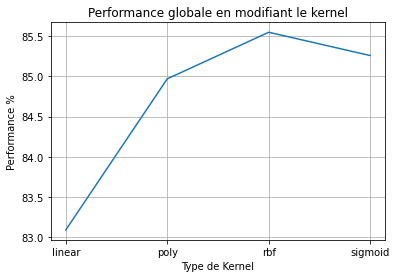

In [247]:
# Les paramètres
K=['linear','poly','rbf','sigmoid']

# Les résultats
AccuracyTAB=[]

# Test du classifieur en modifiant les Kernels
for i in range(len(K)):
    model = SklearnClassifier(SVC(kernel = K[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB.append(round(accuracy,2))
    
# Affichage des courbes
plt.grid(True)
plt.plot(K,AccuracyTAB)
plt.title("Performance globale en modifiant le kernel")
plt.xlabel("Type de Kernel")
plt.ylabel("Performance %")
plt.show()

Le graphe permet de mettre en évidence le choix du meilleur hyperparamètre "kernel" pour l'algorithme de classification SVC dans ce cas d'utilisation. Il existe d'autres hyperparamètres mais nous n'allons les modifier.

Essayons de faire de même avec plusieurs avec d'autres algorithmes de classification

#### 1.b) Test du classifieur DecisionTreeClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [248]:
model = SklearnClassifier(DecisionTreeClassifier())
# On entraine le model
model.train(training)

# On test le classifier en utilisant l'échantillon "testing"
accuracy = nltk.classify.accuracy(model, testing)*100
accuracy = (round(accuracy,2))
print ("La précision de classification est de "+str(accuracy)+"%")

La précision de classification est de 76.01%


#### 1.c) Test du classifieur KNN (KNeighborsClassifier)
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

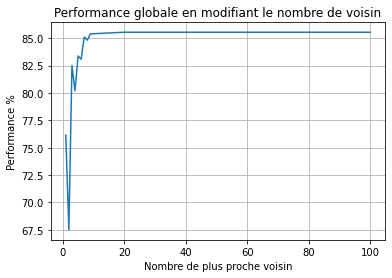

In [249]:
# Les paramètres
N=[1,2,3,4,5,6,7,8,9, 20, 50, 100]

# Les résultats
AccuracyTAB=[]

# Test du classifieur en modifiant le nombre de voisin
for i in range(len(N)):
    model = SklearnClassifier(KNeighborsClassifier(n_neighbors= N[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB.append(round(accuracy,2))
    
# Affichage des courbes
plt.grid(True)
plt.plot(N,AccuracyTAB)
plt.title("Performance globale en modifiant le nombre de voisin")
plt.xlabel("Nombre de plus proche voisin")
plt.ylabel("Performance %")
plt.show()

#### 1.d) Test du classifieur RandomForestClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

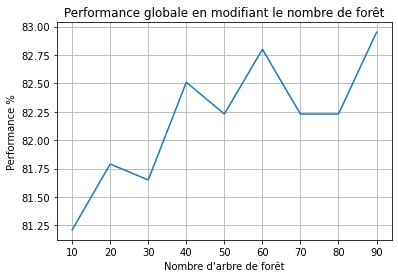

In [250]:
# Les paramètres
E=np.arange(10, 100, 10)

# Les résultats
AccuracyTAB=[]

# Test du classifieur en modifiant le nombre de forêt
for i in range(len(E)):
    model = SklearnClassifier(RandomForestClassifier(n_estimators=E[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB.append(round(accuracy,2))
    
# Affichage des courbes
plt.grid(True)
plt.plot(E,AccuracyTAB)
plt.title("Performance globale en modifiant le nombre de forêt")
plt.xlabel("Nombre d'arbre de forêt")
plt.ylabel("Performance %")
plt.show()

#### 1.e) Test du classifieur LogistiqueRegression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

/Users/jeremy-laurent/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/jeremy-laurent/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


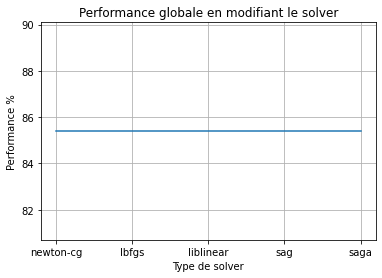

In [251]:
# Les paramètres
M=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Les résultats
AccuracyTAB=[]

# Test du classifieur en modifiant le solver
for i in range(len(M)):
    model = SklearnClassifier(LogisticRegression(solver=M[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB.append(round(accuracy,2))
    
# Affichage des courbes
plt.grid(True)
plt.plot(M,AccuracyTAB)
plt.title("Performance globale en modifiant le solver")
plt.xlabel("Type de solver")
plt.ylabel("Performance %")
plt.show()

#### 1.f) Test du classifieur Naive_bayes.MultinomialNB
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

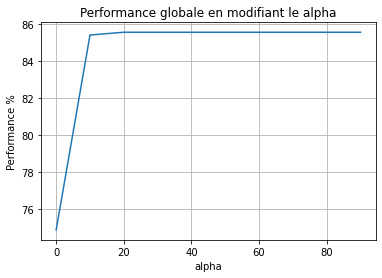

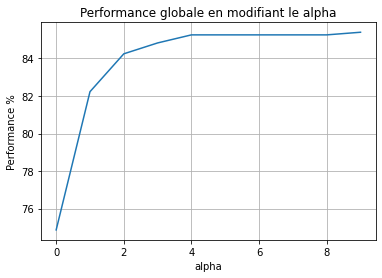

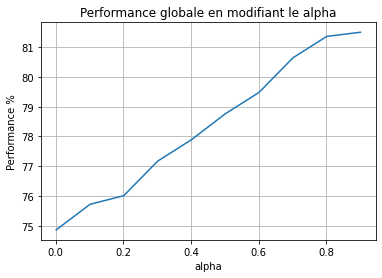

In [252]:
# Les paramètres
A=np.arange(0.001, 100, 10)
B=np.arange(0.001, 10, 1)
C=np.arange(0.001, 1, 0.1)

# Les résultats
AccuracyTAB=[]
AccuracyTAB2=[]
AccuracyTAB3=[]

# Test du classifieur en modifiant le alpha
for i in range(len(A)):
    model = SklearnClassifier(MultinomialNB(alpha=A[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB.append(round(accuracy,2))
    
for i in range(len(B)):
    model = SklearnClassifier(MultinomialNB(alpha=B[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB2.append(round(accuracy,2))
    
for i in range(len(C)):
    model = SklearnClassifier(MultinomialNB(alpha=C[i]))
    model.train(training)
    accuracy = nltk.classify.accuracy(model, testing)*100
    AccuracyTAB3.append(round(accuracy,2))
    
# Affichage des courbes
plt.grid(True)
plt.plot(A,AccuracyTAB)
plt.title("Performance globale en modifiant le alpha")
plt.xlabel("alpha")
plt.ylabel("Performance %")
plt.show()

plt.grid(True)
plt.plot(B,AccuracyTAB2)
plt.title("Performance globale en modifiant le alpha")
plt.xlabel("alpha")
plt.ylabel("Performance %")
plt.show()

plt.grid(True)
plt.plot(C,AccuracyTAB3)
plt.title("Performance globale en modifiant le alpha")
plt.xlabel("alpha")
plt.ylabel("Performance %")
plt.show()

### 2. Génération d'un Meta-Classifieur avec Scikit-Learn 
On adopte le principe des méthodes ensemblistes: c'est à dire utiliser des classifieurs différents (qui ne classent pas de la même manière) pour obtenir de meilleurs résultats. 

Nous avons déterminé dans la précédente partie des hyperparamètres qui améliore la performance global de chaque algorithme de classfication. Nous allons réaliser deux méta_classifieurs:
- meta_modèle normal: qui conservera les hyperparamètres par défaut, puis réalisation du vote entre les classifieurs.
- méta_modèle_optimisé: qui aura les hyperparamètres optimisé selon les résultats précédents.

#### 2.a) Meta_modèle sans optimisation

In [253]:
# Modèle individuels
KNC=KNeighborsClassifier()
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier()
LG=LogisticRegression()
SGDC=SGDClassifier()
M=MultinomialNB()
SC=SVC()

# Construction du meta-modèle
meta_model = SklearnClassifier(VotingClassifier(estimators=[('k1',KNC),('k2',DTC),('k3',RFC),('k4',LG),('k5',SGDC),('k6',M),('k7',SC)],voting="hard"))
meta_model.train(training_n3)
accuracy = nltk.classify.accuracy(meta_model, testing)*100
accuracy = (round(accuracy,3))
print("Précision de meta_classifieur: {}".format(accuracy)+"%")

Précision de meta_classifieur: 84.393%


#### 2.b) Meta_Modèle avec optimisation

In [254]:
# Modèle individuels optimisés
KNC=KNeighborsClassifier(n_neighbors=50)
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier(n_estimators=100)
LG=LogisticRegression(solver='newton-cg')
SGDC=SGDClassifier(max_iter = 1)
M=MultinomialNB(alpha=100)
SC=SVC(kernel = 'linear')

# Construction du meta-modèle
meta_model2 = SklearnClassifier(VotingClassifier(estimators=[('k1',KNC),('k2',DTC),('k3',RFC),('k4',LG),('k5',SGDC),('k6',M),('k7',SC)],voting="hard"))
meta_model2.train(training_n2)
accuracy2 = nltk.classify.accuracy(meta_model2, testing)*100
accuracy2 = (round(accuracy2,3))
print("Précision de meta_classifieur optimisé: {}".format(accuracy2)+"%")

/Users/jeremy-laurent/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Précision de meta_classifieur optimisé: 84.827%


#### 2.c) Diagramme de comparaison

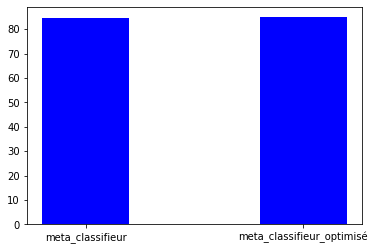

In [255]:
#Diagramme de comparaison
fig = plt.figure()

x = ['meta_classifieur','meta_classifieur_optimisé']
height = [accuracy,accuracy2]
width = 0.4 # modifier la largeur des bâtons
plt.bar(x, height, width, color='b' )
plt.show()

### 3) Test de l'algorithme d'apprentissage

#### 3.a) Prédiction du dataset testing

Nous allons à présent tester l'algorithme sur le jeu de données testing (différents de la partie d'apprentissage)

In [256]:
#On dézipe testing pour séparer les labels et les features
txt_features, labels = zip(*testing)

prediction = meta_model2.classify_many(txt_features)

### 4) Explication des résultats

#### 4.a) Matrice de confusion

##### Explication du tableau de résultats
print("precision = À quel point les prédictions positives sont précises")
print("TP/(TP+FP)\n")

print("recall = Couverture des observations vraiment positives")
print("TP/(TP+FN)\n")

print("F1_score = Indicateur hybride utilisé pour les classes non-balancées")
print("2TP/(2TP+FP+FN)\n")

# affichage des résultats
erreur= round((100-accuracy),3)
print("L'erreur est de: {}".format(erreur)+" %\n")
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['En réalité', 'En réalité'], ['disliked', 'Liked']],
    columns = [['Ce qui été prédit', 'Ce qui été prédit'], ['disliked', 'Liked']])

#### Courbe ROC

La courbe ROC représente le taux de True Positives en fonction de taux de False Positives et obtenue en faisant varier le seuil. 

cf: https://stanford.edu/~shervine/l/fr/teaching/cs-229/pense-bete-machine-learning-petites-astuces

tuto traçage de la courbe: https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/

Ces indicateurs sont résumés dans le tableau suivant :


|        Indicatieur          |       Formule         |       Equivalent      |
|-----------------------------|-----------------------|-----------------------|
|   True Positive Rate TPR    |    $(TP)/(TP+FN)$     |   Recall, sensitivity |
|   False Positive Rate FPR   |    $(FP)/(TN+FP)$     |      1-specificity    |



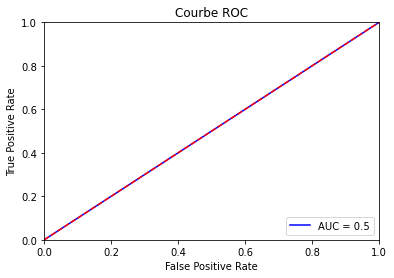

In [258]:
# Importation bibliothèques
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

# Transformation de la liste en tableau
labelsTAB = np.asarray(labels)

# Calcul du FPR et du TPR
false_positive_rate, true_positive_rate, thresholds = roc_curve(labelsTAB, prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Affichage de la courbe
plt.title('Courbe ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.1f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## C. Conclusion

Ce classifieur ne fontionne pas très bien: 2 choses le prouve:
 - La matrice de confusion démontre une mauvaise répartition des échantillions de test de training (le programme à du mal à reconnaitre les dislikes)
 - La courbe ROC possède une air nulle, ce qui veut dire que notre classifieur ne sait pas vraiment classer les descriptions (il ne se trompe pas tout le temps --> aire négative, il classe parfaitement --> aire positive)
 
Cela est principalement dû au fait que les likes et les dislikes de l'utilisateur, étant générés aléatoirement, ne sont pas cohérant. Néanmois si ont fait liké à notre utilisateur beaucoup plus que dislike, notre classifieur aura une performance bien meilleur.